Visualizes fitness over time
Fitness := number of food collected / number of agents

In [17]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

raw_values = []
avg_fitness_values = []
worst_fitness_values = []
random_files = ['GA_5RandomAgent_0.1elitism_0.1mutation_40food_20blocks', 'GA_5RandomAgent_0.1elitism_0.1mutation_40food_30blocks']

for file in random_files:
    with open(file, 'rb') as f:
        temp_values = pickle.load(f)
    raw_values.append(temp_values)
    raw_fitness_values = temp_values['fitness values']

    avg_fitness_values.append([-1*sum(i)/len(i) for i in raw_fitness_values])
    worst_fitness_values.append([-1*max(i) for i in raw_fitness_values])

df_avg_fitness = pd.DataFrame(avg_fitness_values, ['20 barriers', '30 barriers']).transpose()
df_worst_fitness = pd.DataFrame(worst_fitness_values, ['20 barriers', '30 barriers']).transpose()

{'coding_dict': {'empty': 0, 'agent': 1, 'bounds': 2, 'hive': 3, 'blockade': 4, 'food_start': 6}, 'N': 10, 'M': 10, 'max_food': 5, 'observation_radius': 1, 'steps': 300, 'spawn_rate': 2, 'pheromone': {'evaporation': 0.05, 'diffusion': 0.1, 'step': 0.1, 'step_if_food': 0.3, 'cap': 5}, 'grid': {'food': 40, 'blockade': 20}, 'env_actions': [(0, 0), (0, -1), (0, 1), (1, 0), (-1, 0)], 'rgb_coding': {0: [0, 0, 0], 1: [150, 0, 150], 2: [100, 100, 100], 3: [150, 150, 0], 4: [45, 0, 255], 6: [0, 255, 45], 7: (0, 250, 50), 8: (0, 245, 55), 9: (0, 240, 60), 10: (0, 235, 65), 11: (0, 230, 70), 12: (0, 225, 75), 13: (0, 220, 80), 14: (0, 215, 85), 15: (0, 210, 90)}}


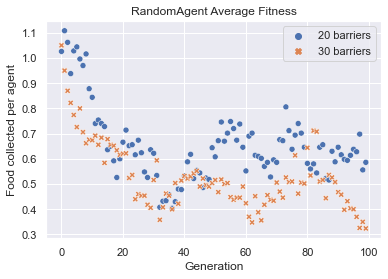

In [20]:
sns.set(style='darkgrid')
ax = sns.scatterplot(data=df_avg_fitness)
plt.title('RandomAgent Average Fitness')
# Set x-axis label
plt.xlabel('Generation')
# Set y-axis label
plt.ylabel('Food collected per agent')
# Set legend
# plt.legend(title='Barriers', labels=['20', '30'])

print(env_params)

{'coding_dict': {'empty': 0, 'agent': 1, 'bounds': 2, 'hive': 3, 'blockade': 4, 'food_start': 6}, 'N': 10, 'M': 10, 'max_food': 5, 'observation_radius': 1, 'steps': 300, 'spawn_rate': 2, 'pheromone': {'evaporation': 0.05, 'diffusion': 0.1, 'step': 0.1, 'step_if_food': 0.3, 'cap': 5}, 'grid': {'food': 40, 'blockade': 20}, 'env_actions': [(0, 0), (0, -1), (0, 1), (1, 0), (-1, 0)], 'rgb_coding': {0: [0, 0, 0], 1: [150, 0, 150], 2: [100, 100, 100], 3: [150, 150, 0], 4: [45, 0, 255], 6: [0, 255, 45], 7: (0, 250, 50), 8: (0, 245, 55), 9: (0, 240, 60), 10: (0, 235, 65), 11: (0, 230, 70), 12: (0, 225, 75), 13: (0, 220, 80), 14: (0, 215, 85), 15: (0, 210, 90)}}


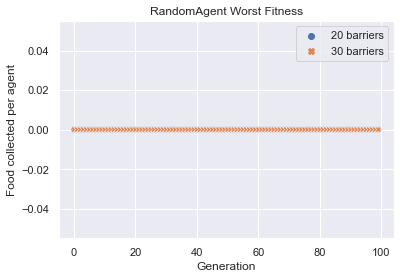

In [21]:
sns.set(style='darkgrid')
ax = sns.scatterplot(data=df_worst_fitness)
plt.title('RandomAgent Worst Fitness')
# Set x-axis label
plt.xlabel('Generation')
# Set y-axis label
plt.ylabel('Food collected per agent')
# Set legend
# plt.legend(title='Barriers', labels=['20', '30'])

print(env_params)